In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')

In [4]:
df = pd.read_csv(path/'data.csv')
df.head()

,label,text,is_valid
0,Accident,\n.MICRO.\nNONE\n.LOCATIONExtremities\n.INJURY...,False
1,Accident,\n.MICRO.\nHeart - no significant histopatholo...,False
2,Suicide,\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging...,False
3,Homicide,\n.MICRO.\nHEART: The sections of heart demons...,False
4,Homicide,\n.MICRO.\nHeart: No diagnostic abnormality. ...,False


In [5]:
df.tail()

,label,text,is_valid
7672,Homicide,"\n.MICRO.\nHEART: Occasional, hypertrophic myo...",True
7673,Homicide,\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYFirearm...,False
7674,Accident,"\n.MICRO.\nBRAIN: No significant, histopatholo...",True
7675,Suicide,\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYBlunt i...,False
7676,Suicide,\n.MICRO.\nHEART: No significant histopatholog...,False


In [6]:
df['text'][1]

'\n.MICRO.\nHeart - no significant histopathology\n\nLungs - congestion, no significant histopathology\n\nKidneys - no significant histopathology\n\nLiver - no significant histopathology\n\nHippocampus - no significant histopathology\n.LOCATIONExtremities\n.INJURYBlunt injury.\n.INJURYDESC.\nHealing abrasions measuring from 0.1 to 0.2 cm are on the posterior right hand.\n \nA 0.2 x 1.1 cm healing abrasion is in the left inguinal fold. \n\n\n\n.LOCATIONHead\n.INJURYBlunt injury.\n.INJURYDESC.\nA 0.9 x 0.6 cm abrasion is on the right side of the chin. '

In [7]:
df['text'][0]

'\n.MICRO.\nNONE\n.LOCATIONExtremities\n.INJURYBlunt injury.\n.INJURYDESC.\nSKIN AND DEEP SOFT TISSUES \n\nParchment-like brown and red abrasions are extensive over bony prominences.  \n\nA gaping laceration is in the skin of the right thenar eminence.\n\nA gaping laceration is in the proximal anterior left shin.\n\n\nSKELETAL ELEMENTS\n\nNo palpable fractures.\n\n\n.LOCATIONTrunk\n.INJURYBlunt injury.\n.INJURYDESC.\nSKIN AND DEEP SOFT TISSUES OF THE CHEST AND ABDOMEN\n\nExtensive linear red and brown parchment-like abrasions are across the skin of the chest and abdomen.  \n\n\nSKIN AND DEEP SOFT TISSUES OF THE BACK\n\nExtensive linear and irregular red and brown parchment-like abrasions are across the skin of the back (left paramidline and left lower back greater than right).\n\n\nRIBS AND STERNUM\n\nExtensive fractures are palpable in the anterior ribs arcs.\n\n\nCLAVICLES\n\nNo palpable fractures.\n\n\nSCAPULAE\n\nNo palpable fractures.\n\n\nVERTEBRAL COLUMN\n\nNo palpable fractures

In [8]:
df['text'][2]

'\n.MICRO.\nNONE\n.LOCATIONNeck\n.INJURYHanging.\n.INJURYDESC.\nEncircling the neck is a 1.0 cm brown abraded ligaure furrow which crosses over the thyroid cartilage at the midline and cants upwards and backwards toward the nape of the neck lying 4.0 cm below the right ear and 1.5 cm below the left ear. No other neck trauma is noted. \n\nOverlying the ligature furrow is a 1.0 cm wide white rope ligature tied in a noose-type knot. '

In [9]:
df['text'][4]

"\n.MICRO.\nHeart: No diagnostic abnormality.  \n\nLungs: No diagnostic abnormality.  \n\nLiver: There is a nodular proliferation demarcated by intersecting fibrous septae. The periphery of the nodules shows bile ductular proliferation and lymphocytes. The background liver shows minimal macrosteatosis with mild lymphocytic portal inflammation and rare mixed lobular inflammation.\n\nKidney: There are multifocal tubular calcifications.\n\nBrain: A section of the hippocampus shows scattered mild acute hypoxic-ischemic type changes.\n\n.LOCATIONBack\n.INJURYFirearm injury.\n.INJURYDESC.\nPERFORATING GUNSHOT WOUND OF BACK\n\nGUNSHOT ENTRANCE WOUND, INDETERMINATE RANGE OF FIRE:\nOn the right aspect of the back, in the subscapular region, 40.5 cm below the top of the head and 12.5 cm right of the posterior midline, is an ovoid 2.0 cm x 0.6 cm gunshot entrance wound with a 0.1 to 0.4 cm wide pink marginal abrasion from 1 o'clock to 9 oâ\x80\x99clock that is widest at 3 oâ\x80\x99clock. A 3 x 2

In [10]:
df['text'][3038]

'\n.MICRO.\nMicroscopic Description:\n\nPlease note that due to decomposition, many of the representative sections have moderate to severe autolytic changes.\n\nThe liver is severely autolyzed without significant inflammation or fibrosis.\n\nThe pancreas is severely autolyzed without residual islets or acini. There is moderate fibrosis without significant inflammation.\n\nThe left kidney has an appropriate number of glomeruli without significant sclerosis or inflammation. The tubules have moderate autolytic change without inflammation, tubule drop out or fibrosis. No polarizable material is present.\n\nThe heart has no significant inflammation or fibrosis. The cardiac myocytes are unremarkable. The myocardial vessels are patent without significant medial hypertrophy or thrombosis.\n\nThe lungs have moderate autolytic changes without significant inflammation or fibrosis. No polarizable material is present.\n\nThe left cerebellum has no neuronal loss, inflammation, gliosis or hypoxic-isc

In [11]:
df['text'][3040]

'\n.MICRO.\nBrain: The brain is contused, but there are no definite ischemic changes.\n\nHeart: There is a mild increase in interstitial fibrosis in the right ventricle at the subendocardial surface.\n\nLungs: The alveolar air spaces are filled with blood, and there are some mild-moderate emphysematous changes.\n\nLiver: There is an increase in steatosis (~50%), and there is a mild increase in lobular neutrophilic inflammation without an increase in fibrosis.\n\nKidney: There is a mild increase in glomerulosclerosis, and the arterioles are mildly thickened.  There is some chronic interstitial atrophy.\n.LOCATIONHead\n.INJURYFirearm injury.\n.INJURYDESC.\nGUNSHOT WOUND OF HEAD\n\nEntrance:\n\nOn the hard palate, 14 cm below the top of the head and 0.5 cm right of the anterior midline, is an entrance gunshot wound consisting of a 0.8 x 1.2 cm irregular-oval defect with a 0.8 x 1.3 cm thin discontinuous rim of pink marginal abrasion that is widest at 3 oâ\x80\x99clock. Soot, unburned gunp

In [12]:
df['text'][3041]

'\n.MICRO.\nHeart: Section shows areas of myocyte hypertrophy.\n\nLung: Section shows pigment-laden macrophages and extravasated red blood cells within alveolar spaces. No polarizable material is present.\n\nLiver: Section shows central vein and centrilobular sinusoidal dilation. There is mildly increased portal fibrosis and rare areas of bridging fibrosis.\n\nKidney: Section shows scattered sclerotic glomeruli.\n.LOCATIONExtremity\n.INJURYThermal injury.\n.INJURYDESC.\nThe dorsal left hand and dorsal surfaces of the left 3rd, 4th, and 5th digits show superficial thermal injury, consisting of scattered skin blisters.'

In [13]:
bs=32

In [14]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxup heart : xxmaj frequent myofibers are enlarged with ' box - xxunk nuclei . \n\n xxup kidneys : xxmaj rare , globally sclerotic glomeruli ; occasional area of predominantly lymphocytic , interstitial inflammation \n\n xxup liver : xxmaj mild to moderate , predominantly macrovesicular steatosis and mild to moderate , portal and lobular , chronic , active xxunk with piecemeal necrosis . \n\n",Homicide
"xxbos \n xxup .micro . \n xxup heart : hypertrophic myocytes \n\n xxup lungs : autolysis , abundant intra - alveolar proteinaceous material , patchy deposition of brown - black pigment around bronchioles \n\n xxup liver : minimal macrovesicular steatosis \n\n xxup kidneys : no significant histopathology \n\n xxup brain : hypoxic - ischemic change of the xxmaj purkinje cells and the xxunk , consisting of hypereosinophilia of the perikarya",Suicide
xxbos \n xxup .micro . \n xxmaj heart : a few slightly enlarged cardiomyocyte nuclei are present . \n\n xxmaj lungs : xxmaj multiple alveoli are filled with degenerating erythrocytes and a few macrophages . \n\n xxmaj liver : xxmaj no significant histopathologic findings . \n\n xxmaj kidney : xxmaj no significant histopathologic findings . \n\n xxmaj brain : xxmaj no significant histopathologic findings . \n\n .locationother \n .injuryother .,Homicide
xxbos \n xxup .micro . \n xxup heart : xxmaj scattered myofibers are enlarged with ' box - car ' nuclei . xxmaj there is mild endocardial fibroelastosis of the septum . \n\n xxup lung : xxmaj there is prominent atelectasis of the parenchyma . xxmaj frequent geographic areas have extravasation of red blood cells into the alveolar spaces . \n\n xxup liver : xxmaj the majority of portal tracts,Homicide


In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=300, nh=198, nl=1)


In [17]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.965659,0.998297,0.655599
2,0.732791,0.747772,0.740885
3,0.578607,0.651248,0.796224
4,0.536375,0.685159,0.784505
5,0.518707,0.513727,0.882812
6,0.490874,0.418410,0.902995
7,0.486486,0.388725,0.910156
8,0.444422,0.386188,0.913411
9,0.425151,0.375181,0.913411
10,0.412392,0.339234,0.912760


In [18]:
from fastai.vision import *

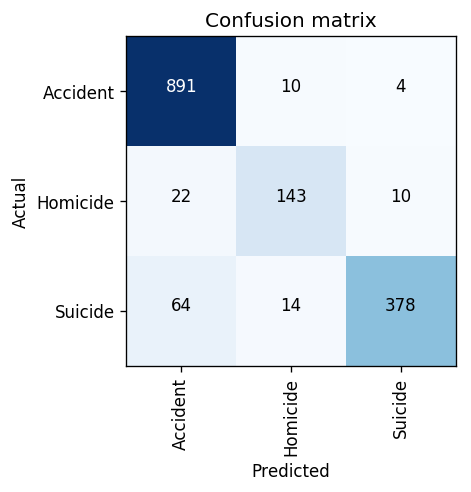

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

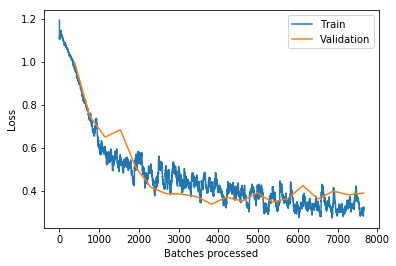

In [20]:
learn.recorder.plot_losses()

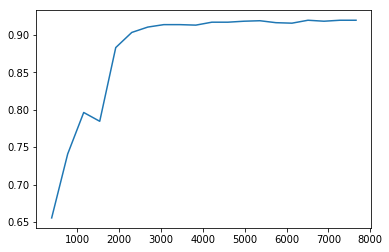

In [21]:
learn.recorder.plot_metrics()